In [1]:
import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Data Import

In [2]:
new=pd.read_excel(r"C:\Users\Sai\Desktop\python\Machine Learning\MLR\Car Price Prediction.xlsx")
new

,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale
0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,16.360
1,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,19.875
2,35.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,18.225
3,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,29.725
4,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,22.255
...,...,...,...,...,...,...,...,...,...,...
151,24.40,1.9,160,100.5,67.6,176.6,3.042,15.8,25,18.061
152,27.50,2.4,168,104.9,69.3,185.9,3.208,17.9,25,18.061
153,28.80,2.4,168,104.9,69.3,186.2,3.259,17.9,25,18.061
154,45.50,2.3,236,104.9,71.5,185.7,3.601,18.5,23,18.061


## Data Type

In [3]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price_in_thousands  156 non-null    float64
 1   Engine_size         156 non-null    float64
 2   Horsepower          156 non-null    int64  
 3   Wheelbase           156 non-null    float64
 4   Width               156 non-null    float64
 5   Length              156 non-null    float64
 6   Curb_weight         156 non-null    float64
 7   Fuel_capacity       156 non-null    float64
 8   Fuel_efficiency     156 non-null    int64  
 9   Resale              156 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 12.3 KB


# Univariate Analysis

In [4]:
new.describe() 

,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,27.439532,3.060897,185.948718,107.487179,71.150000,187.343590,3.381949,17.951923,23.878205,18.060808
std,14.318249,1.044653,56.700321,7.641303,3.451872,13.431754,0.630372,3.887921,4.296049,10.076940
min,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,5.160000
25%,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,12.527500
50%,23.099500,3.000000,177.500000,107.000000,70.550000,187.900000,3.355000,17.200000,24.000000,17.617500
75%,32.253750,3.575000,215.000000,112.200000,73.425000,196.125000,3.821500,19.575000,26.000000,18.080750
max,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,67.550000


# EDA
* Identify & Treatment of Outlier

<AxesSubplot:>

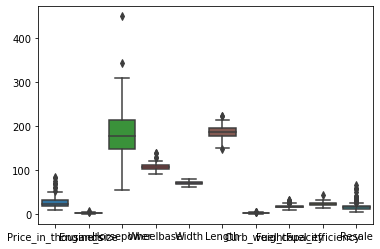

In [5]:
sns.boxplot(data=new)

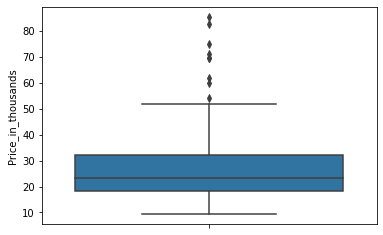

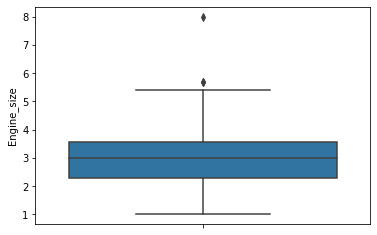

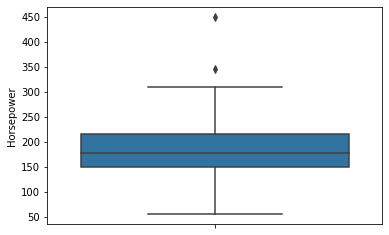

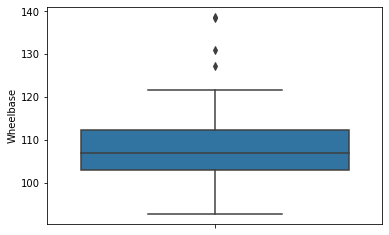

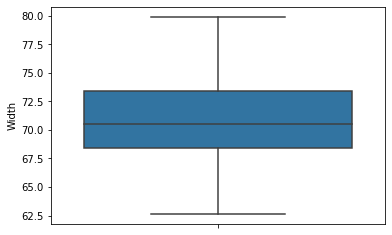

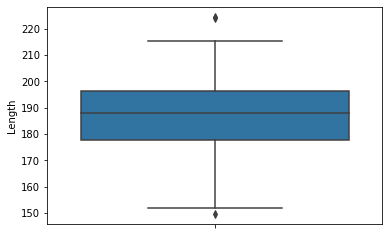

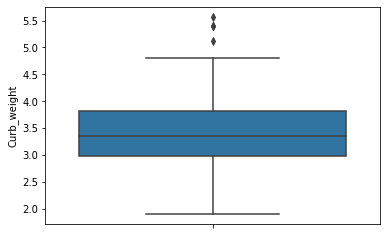

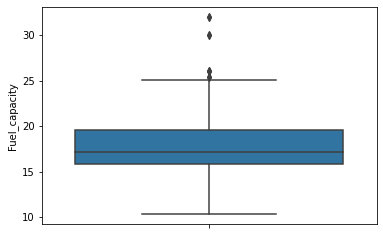

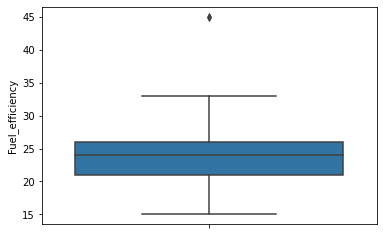

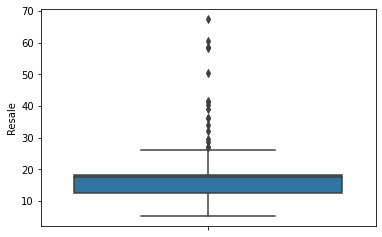

In [6]:
import matplotlib.pyplot as plt
i=[	"Price_in_thousands","Engine_size","Horsepower","Wheelbase","Width","Length","Curb_weight","Fuel_capacity","Fuel_efficiency","Resale"]

for j in i:
    plt.figure()
    sns.boxplot(y=new[j])

In [7]:
def outliers(df,colname):
    q1 = df[colname].quantile(0.25)
    q3 = df[colname].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low_limit = q1-1.5*iqr #acceptable range
    upper_limit = q3+1.5*iqr #acceptable range
    df[colname]=(np.where(df[colname] > upper_limit,upper_limit,df[colname])) 

    return df[colname]

In [8]:
for j in i:
    print(outliers(new,j))

0      21.50
1      28.40
2      35.00
3      42.00
4      23.99
       ...  
151    24.40
152    27.50
153    28.80
154    45.50
155    36.00
Name: Price_in_thousands, Length: 156, dtype: float64
0      1.8
1      3.2
2      3.2
3      3.5
4      1.8
      ... 
151    1.9
152    2.4
153    2.4
154    2.3
155    2.9
Name: Engine_size, Length: 156, dtype: float64
0      140.0
1      225.0
2      225.0
3      210.0
4      150.0
       ...  
151    160.0
152    168.0
153    168.0
154    236.0
155    201.0
Name: Horsepower, Length: 156, dtype: float64
0      101.2
1      108.1
2      106.9
3      114.6
4      102.6
       ...  
151    100.5
152    104.9
153    104.9
154    104.9
155    109.9
Name: Wheelbase, Length: 156, dtype: float64
0      67.3
1      70.3
2      70.6
3      71.4
4      68.2
       ... 
151    67.6
152    69.3
153    69.3
154    71.5
155    72.1
Name: Width, Length: 156, dtype: float64
0      172.4
1      192.9
2      192.0
3      196.6
4      178.0
       ...  
151    

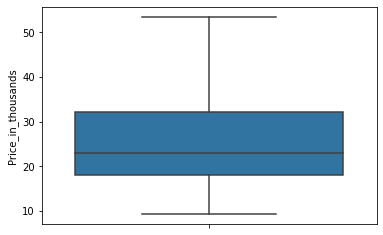

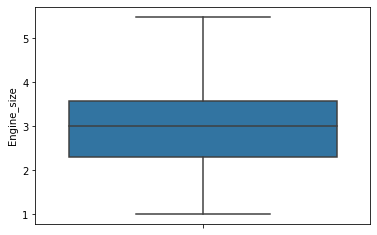

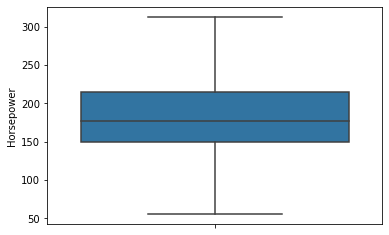

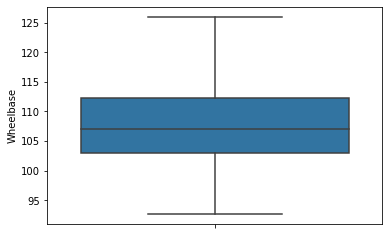

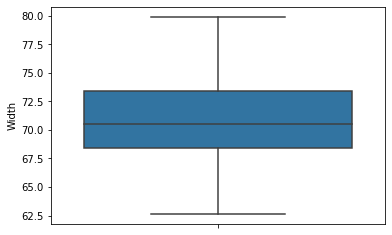

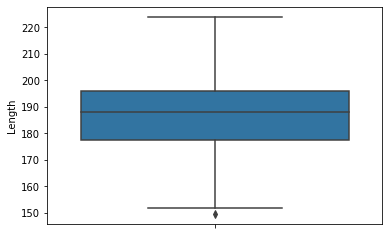

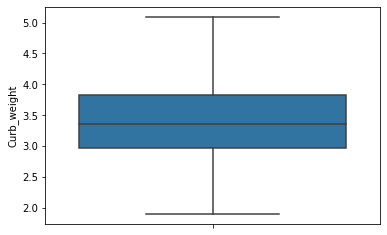

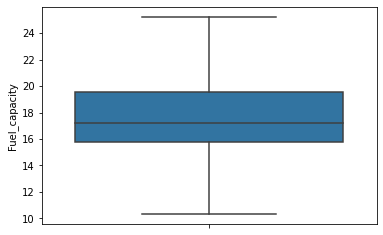

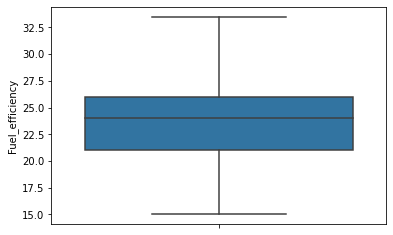

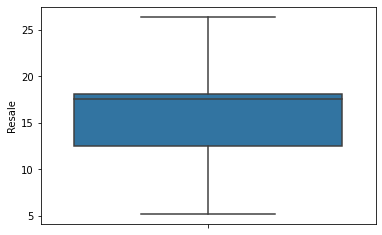

In [9]:
for j in i:
    plt.figure()
    sns.boxplot(y=new[j])

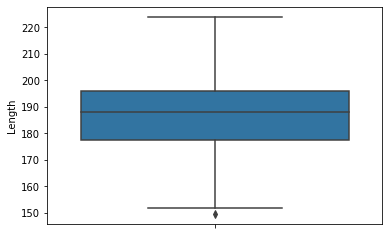

In [10]:
ax = sns.boxplot(y=new["Length"])

In [11]:
q1 = new['Length'].quantile(0.25)
q3 = new['Length'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
low_limit

149.74999999999997

In [12]:
new['Length']=np.where(new['Length'] < low_limit,low_limit,new['Length'])

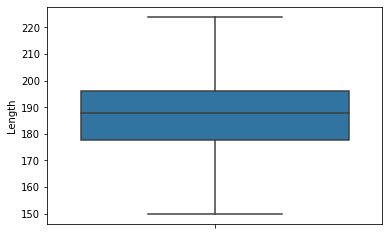

In [13]:
ax = sns.boxplot(y=new["Length"])

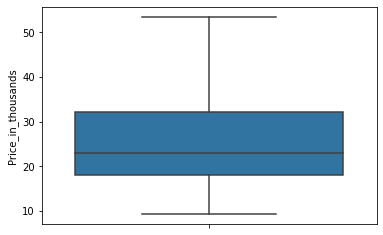

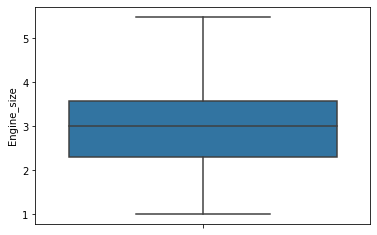

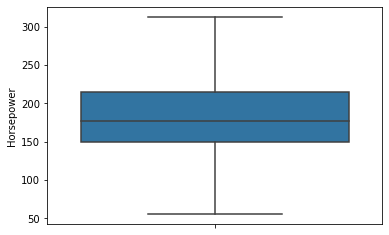

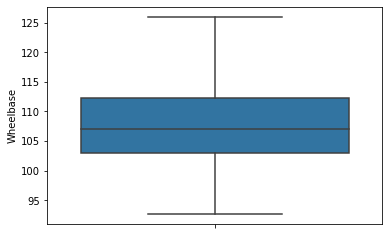

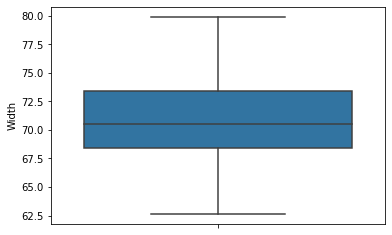

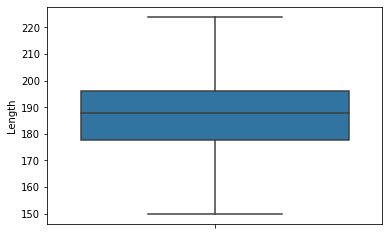

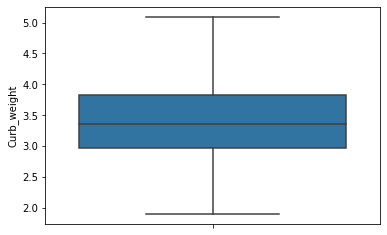

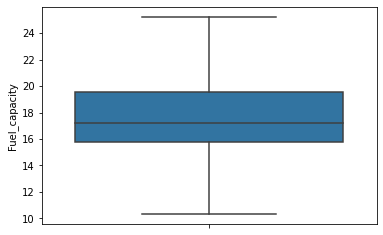

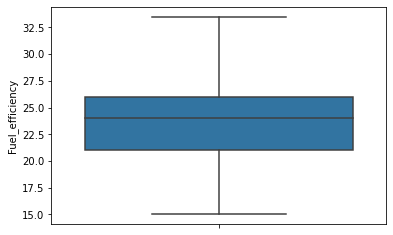

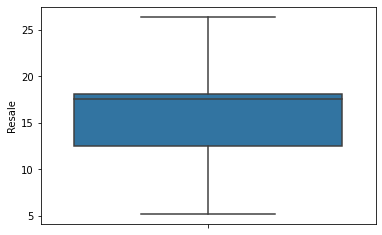

In [14]:
for j in i:
    plt.figure()
    sns.boxplot(y=new[j])

<AxesSubplot:>

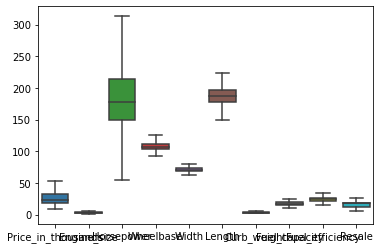

In [15]:
sns.boxplot(data=new)

In [16]:
new.describe() 

,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,26.490734,3.042067,184.868590,107.285897,71.150000,187.340705,3.374872,17.787420,23.804487,16.396100
std,11.539938,0.978600,53.007755,6.973438,3.451872,13.411235,0.608496,3.432476,4.021143,5.310127
min,9.235000,1.000000,55.000000,92.600000,62.600000,149.750000,1.895000,10.300000,15.000000,5.160000
25%,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,12.527500
50%,23.099500,3.000000,177.500000,107.000000,70.550000,187.900000,3.355000,17.200000,24.000000,17.617500
75%,32.253750,3.575000,215.000000,112.200000,73.425000,196.125000,3.821500,19.575000,26.000000,18.080750
max,53.512500,5.487500,313.250000,126.000000,79.900000,223.950000,5.094250,25.237500,33.500000,26.410625


In [17]:
new.isna().sum() 

Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Resale                0
dtype: int64

## Step 3 : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [18]:
new.head()

,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale
0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,16.360000
1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,19.875000
2,35.00,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,18.225000
3,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,26.410625
4,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,22.255000


In [19]:
df=np.sqrt(new)

In [20]:
df1=np.sqrt(df)

In [22]:
# Putting feature variable to X
X = df1.drop('Resale', axis= 1)

# Putting response variable to y
y = df1[['Resale']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [23]:
data = pd.concat([y_train, X_train], axis=1)
data.head()

,Resale,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency
59,2.046042,2.271017,1.337481,3.783890,3.211703,2.896631,3.653650,1.401401,2.143239,2.087798
3,2.266964,2.545730,1.367782,3.806754,3.271871,2.906863,3.744518,1.400765,2.059767,2.165737
113,1.668497,1.885544,1.189207,3.389561,3.201086,2.936928,3.634014,1.264788,1.880302,2.320596
85,1.722347,2.007458,1.189207,3.343702,3.212458,2.883165,3.687020,1.289973,1.967990,2.300327
152,2.061510,2.289988,1.244666,3.600206,3.200323,2.885249,3.692494,1.338316,2.056900,2.236068


# Correlation Matrix

In [24]:
data.corr()

,Resale,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency
Resale,1.000000,0.826703,0.561578,0.709660,0.300361,0.276860,0.264270,0.618697,0.542876,-0.537262
Price_in_thousands,0.826703,1.000000,0.714493,0.878588,0.386340,0.434087,0.314672,0.717578,0.636395,-0.672407
Engine_size,0.561578,0.714493,1.000000,0.870424,0.667938,0.757612,0.697868,0.862878,0.764828,-0.784874
Horsepower,0.709660,0.878588,0.870424,1.000000,0.552974,0.620977,0.556044,0.777080,0.697721,-0.701638
Wheelbase,0.300361,0.386340,0.667938,0.552974,1.000000,0.767723,0.850599,0.725517,0.708277,-0.583841
Width,0.276860,0.434087,0.757612,0.620977,0.767723,1.000000,0.739667,0.719196,0.645176,-0.627071
Length,0.264270,0.314672,0.697868,0.556044,0.850599,0.739667,1.000000,0.684595,0.665173,-0.488688
Curb_weight,0.618697,0.717578,0.862878,0.777080,0.725517,0.719196,0.684595,1.000000,0.894353,-0.881773
Fuel_capacity,0.542876,0.636395,0.764828,0.697721,0.708277,0.645176,0.665173,0.894353,1.000000,-0.826523
Fuel_efficiency,-0.537262,-0.672407,-0.784874,-0.701638,-0.583841,-0.627071,-0.488688,-0.881773,-0.826523,1.000000


In [25]:
sns.set(rc = {'figure.figsize':(15,8)})

<AxesSubplot:>

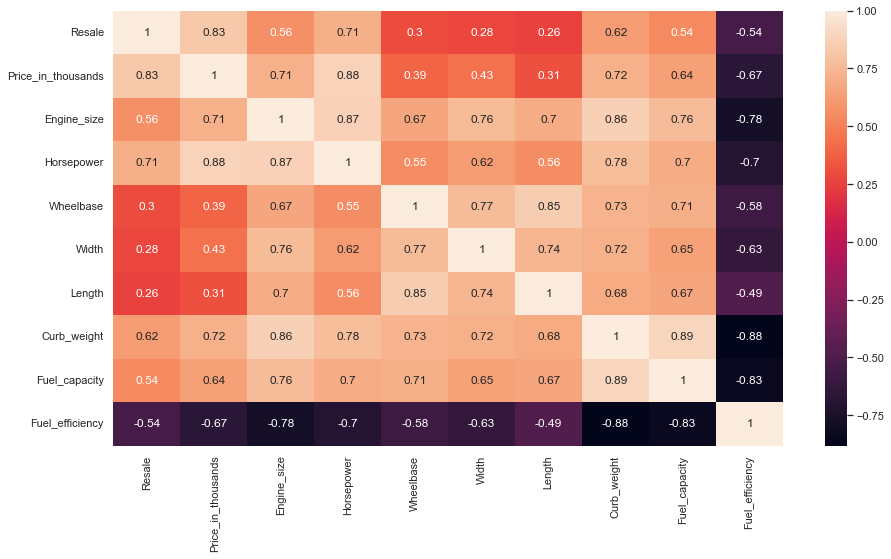

In [26]:
sns.heatmap(data.corr(),annot = True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Resale vs Price_in_thousands'}, xlabel='Price_in_thousands', ylabel='Resale'>

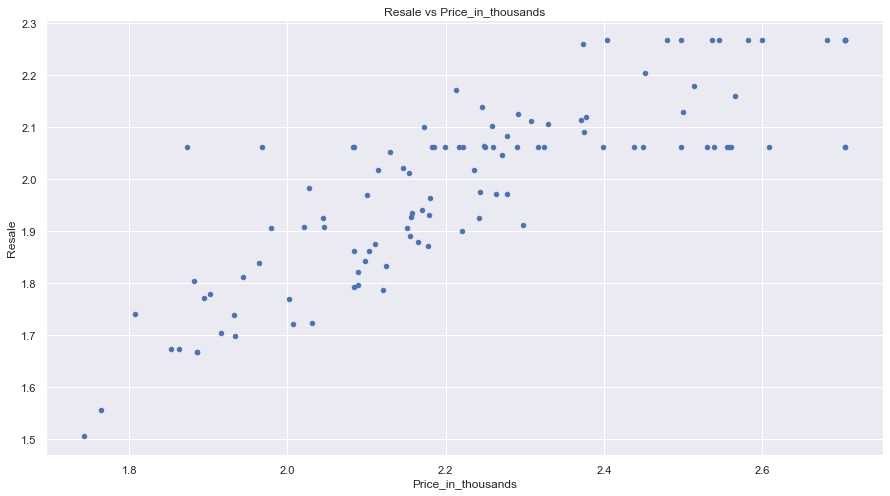

In [27]:
data.plot.scatter(x='Price_in_thousands', y='Resale', title='Resale vs Price_in_thousands')

Price in thousands have 80% strong positve correlation with Resale

Price in thousands have high impact on Resale

There is  colinearity in data

#### Multicolinearity (with the help of VIF)

In [55]:
X1.values

NameError: name 'X1' is not defined

In [ ]:
X1.shape[1]

In [ ]:
X1.columns

In [28]:
X1=data.drop(['Resale'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Price_in_thousands      594.242387
Engine_size            1174.820651
Horsepower             1858.945134
Wheelbase             19558.579645
Width                 13310.243679
Length                17478.917046
Curb_weight            5161.503245
Fuel_capacity          2227.556554
Fuel_efficiency        2268.449516
dtype: float64

### Multicollinearity exist

Model Building

H0 :- There is no Linear relationship between Resale and Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,
    Curb weight,Fuel capacity,Fuel efficiency

Vs

H1 :- There is Linear relationship between Resale and Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,
    Curb weight,Fuel capacity,Fuel efficiency

Alpha = 0.05 (5%)

In [29]:
import statsmodels.formula.api as smf
model2=smf.ols('Resale ~ Price_in_thousands+Engine_size+Horsepower+Wheelbase+Width+Length+Curb_weight+Fuel_capacity+Fuel_efficiency',data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Resale   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     27.84
Date:                Thu, 19 May 2022   Prob (F-statistic):           2.09e-23
Time:                        12:24:25   Log-Likelihood:                 105.03
No. Observations:                 109   AIC:                            -190.1
Df Residuals:                      99   BIC:                            -163.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.5670      1.341      1.169      0.245      -1.093       4.227
Price_in_thousands     0.5668      0.103      5.502      0.000       0.362       0.771
Engine_size           -0.1723      0.249     -0.693      0.490      -0.665       0.321
Horsepower             0.0206      0.110      0.188      0.852      -0.197       0.238
Wheelbase             -0.1692      0.405     -0.417      0.677      -0.974       0.635
Width                 -0.9936      0.482     -2.063      0.042      -1.949      -0.038
Length                 0.2055      0.333      0.617      0.538      -0.455       0.866
Curb_weight            1.0684      0.501      2.134      0.035       0.075       2.062
Fuel_capacity         -0.0217      0.215     -0.101      0.920      -0.449       0.406
Fuel_efficiency        0.2619      0.240      1.090      0.278      -0.215       0.738
==============================================================================
Omnibus:                        1.034   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.596   Jarque-Bera (JB):                0.868
Skew:                           0.219   Prob(JB):                        0.648
Kurtosis:                       2.987   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
import statsmodels.formula.api as smf
model2=smf.ols('Resale ~ Price_in_thousands',data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Resale   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     231.0
Date:                Thu, 19 May 2022   Prob (F-statistic):           1.74e-28
Time:                        12:27:19   Log-Likelihood:                 98.962
No. Observations:                 109   AIC:                            -193.9
Df Residuals:                     107   BIC:                            -188.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6516      0.089      7.350      0.000       0.476       0.827
Price_in_thousands     0.5998      0.039     15.199      0.000       0.522       0.678
==============================================================================
Omnibus:                        0.885   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.978
Skew:                           0.199   Prob(JB):                        0.613
Kurtosis:                       2.762   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.formula.api as smf
model2=smf.ols('Resale ~ Price_in_thousands',data=df).fit()
model2.summary()